# 📊 Project Objective:
* ### Analyzed booking **EGYPT** data with Python and Spark to run data‐driven campaigns for two hotels,
* ### Created custom promotions, built cancellation prediction models.

# 🌟 Business Understanding:

| Column Name                        | Description                                                                                      |
|-----------------------------------|--------------------------------------------------------------------------------------------------|
| hotel                             | Type of hotel booked by the customer (e.g., resort hotel or city hotel).                         |
| is_canceled                       | Indicates whether the booking was canceled (1) or not (0).                                        |
| lead_time                         | Number of days between the booking date and the arrival date.                                      |
| arrival_date_year                 | Year of arrival date.                                                                            |
| arrival_date_month                | Month of arrival date.                                                                           |
| arrival_date_week_number          | Week number of arrival date.                                                                     |
| arrival_date_day_of_month         | Day of the month of arrival date.                                                                |
| stays_in_weekend_nights           | Number of weekend nights (Saturday/Sunday) the guest stayed or booked to stay at the hotel.       |
| stays_in_week_nights              | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.         |
| adults                            | Number of adults.                                                                                |
| children                          | Number of children.                                                                              |
| babies                            | Number of babies.                                                                                |
| meal                              | Type of meal booked (e.g., Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board; FB – Full board). |
| country                           | Country of origin of the guest "PRT" Portugal,"ESP"Spain "FRA"  France "DEU"  Germany "GBR" United Kingdom
"USA" the United States of America.                                                                  |
| distribution_channel              | Booking distribution channel (e.g., TA – Travel Agents; TO – Tour Operators).                      |
| is_repeated_guest                 | Indicates if the booking was from a repeated guest (1) or not (0).                                 |
| previous_cancellations            | Number of previous booking cancellations by the customer.                                         |
| previous_bookings_not_canceled    | Number of previous bookings not canceled by the customer.                                          |
| reserved_room_type                | Type of room reserved.                                                                           |
| assigned_room_type                | Type of room assigned to the customer.                                                           |
| booking_changes                   | Number of changes made to the booking.                                                           |
| deposit_type                      | Type of deposit made for the booking (e.g., No Deposit, Non Refund, Refundable).                   |
| agent                             | ID of the travel agency that made the booking.                                                    |
| company                           | ID of the company/entity that made the booking or responsible for payment.                         |
| days_in_waiting_list              | Number of days the booking was in the waiting list before it was confirmed to the customer.       |
| customer_type                     | Type of booking (e.g., Contract, Group, Transient, Transient-Party).                              |
| adr                               | Average daily rate (sum of all lodging transactions divided by the total number of staying nights).|
| required_car_parking_spaces       | Number of car parking spaces required by the customer.                                            |
| total_of_special_requests         | Number of special requests made by the customer (e.g., extra beds, high floor, early check-in).   |


## From the 🌟 Business Understanding:
some key columns that i expect are generally useful for cancellation prediction models:

* Lead Time: This column represents the number of days between the booking date and the arrival date. Bookings made further in advance might have different cancellation patterns compared to last-minute bookings.

* Previous Cancellations: Knowing if the customer has canceled bookings in the past can provide insights into their behavior and the likelihood of them canceling again.

* Booking Changes: The number of changes made to the booking can indicate uncertainty or hesitation from the customer's side, which might correlate with a higher cancellation rate.

* Deposit Type: Understanding the type of deposit made for the booking (e.g., non-refundable vs. refundable) can help anticipate cancellation behavior. Non-refundable bookings, for example, might have a lower cancellation rate.

* Total of Special Requests: The number of special requests made by the customer could reflect their level of engagement and satisfaction with the booking, which might influence their likelihood of canceling.

* ADR (Average Daily Rate): This could indirectly influence cancellation rates, as higher prices might make customers more reluctant to cancel.

* Customer Type: Different types of bookings (e.g., transient vs. group) might have different cancellation patterns.

# 📚 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

# ⏳ Loading Dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/egphotelbookings.csv")

In [4]:
df.head(8)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,5,Renaissance Hotel,0,14,2018,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,6,Renaissance Hotel,0,0,2018,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,7,Renaissance Hotel,0,9,2018,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1


# 🧠 Basic Understaning of Data

In [5]:
list_of_numerics=df.select_dtypes(include=['float','int']).columns
types= df.dtypes
missing= round((df.isnull().sum()/df.shape[0]),3)*100
overview= df.apply(lambda x: [round(x.min()),
                                 round(x.max()),
                                 round(x.mean()),
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= df.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))

explo = pd.DataFrame({'Types': types,
                      'Missing%': missing,
                      'Overview': overview,
                      'Outliers': outliers}).sort_values(by=['Missing%','Types'],ascending=False)
explo.transpose()

,company,agent,country,hotel,arrival_date_month,meal,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,children,adr,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
Types,float64,float64,object,object,object,object,object,object,object,object,object,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Missing%,94.3,13.7,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Overview,"[6, 543, 189, 179]","[1, 535, 87, 14]","[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...","[Renaissance Hotel, JW Marriott Hotel]","[July, August, September, October, November, D...","[BB, FB, HB, SC, Undefined]","[Direct, Corporate, TA/TO, Undefined, GDS]","[C, A, D, E, G, F, H, L, P, B]","[C, A, D, E, G, F, I, B, H, P, L, K]","[No Deposit, Refundable, Non Refund]","[Transient, Contract, Transient-Party, Group]","[0, 10, 0, 0]","[-6, 5400, 102, 95]","[0, 119389, 59694, 59694]","[0, 1, 0, 0]","[0, 737, 104, 69]","[2017, 2019, 2018, 2018]","[1, 53, 27, 28]","[1, 31, 16, 16]","[0, 19, 1, 1]","[0, 50, 3, 2]","[0, 55, 2, 2]","[0, 10, 0, 0]","[0, 1, 0, 0]","[0, 26, 0, 0]","[0, 72, 0, 0]","[0, 21, 0, 0]","[0, 391, 2, 0]","[0, 8, 0, 0]","[0, 5, 1, 0]"
Outliers,0,0,0,0,0,0,0,0,0,0,0,8590,3793,0,0,3005,0,0,0,265,3354,29710,917,3810,6484,3620,18076,3698,7416,2877


#### **Company** has 94% null values so we can't fill it, drop it. we don't need babies column so drop this column. **Unnamed**: 0 is just the id drop it. **arrival_date_week_number**: we will not use arrival_date_week_number so drop it.

In [6]:
"""
print dimensionality of the data, columns, types and missing values
"""
print(f"Data dimension: {df.shape}")

Data dimension: (119390, 30)


In [7]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

#🧹 Data Preprocessing Part-1:

In [8]:
# drop company,babies and Unnamed column
df.drop(['company', 'babies', 'Unnamed: 0', 'arrival_date_week_number'], axis=1, inplace=True)

In [9]:
import pandas as pd
df.dropna(subset=['country', 'children'], inplace=True)

In [10]:
columns=["adr","lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]

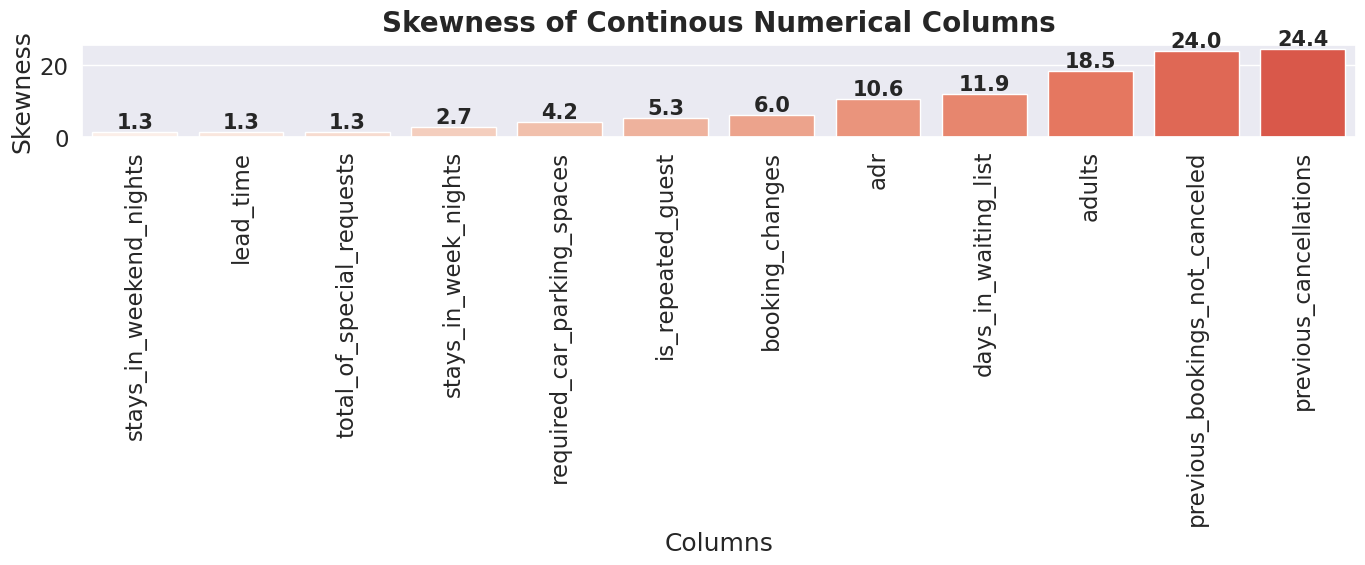

In [11]:
skewness = df[columns].skew().sort_values()
plt.figure(figsize=(14,6))
sns.barplot(x=skewness.index, y=skewness, palette=sns.color_palette("Reds",19))
for i, v in enumerate(skewness):
  plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


In [12]:
import seaborn as sns

def remove_outlier(df, list):
    """Remove outliers from a specified column using the Interquartile Range (IQR) method.

    Parameters:
    - df: DataFrame containing the data
    - col: Column name for which outliers should be removed

    Returns:
    - DataFrame with outliers removed
    """
    for col in list:
      q1, q3 = df[col].quantile([0.25, 0.75])
      iqr = q3 - q1
      lower = q1 - (1.5 * iqr)
      upper = q3 + (1.5 * iqr)

      df = df[((df[col] >= lower) & (df[col] <= upper))]

    return df
def boxplot(df, col_name):
    sns.boxplot( data = df[col_name], orient="h")

In [70]:
df=remove_outlier(df,columns)

In [14]:
# def remove_outliers(df, col_name):
#     # remove outliers in lead_time
#     Q1 = np.percentile(df[col_name], 25, method='midpoint')
#     Q3 = np.percentile(df[col_name], 75, method='midpoint')
#     IQR = Q3 - Q1
#     upper=Q3+1.5*IQR

#     #Below Lower bound
#     lower=Q1-1.5*IQR
#     df = df[((df[col_name]>=lower) & (df[col_name] <= upper))]
#     return df
# def boxplot(df, col_name):
#     sns.boxplot( data = df[col_name], orient="h")

In [15]:
# df = remove_outliers(df, 'lead_time')
# df = remove_outliers(df, 'adr')

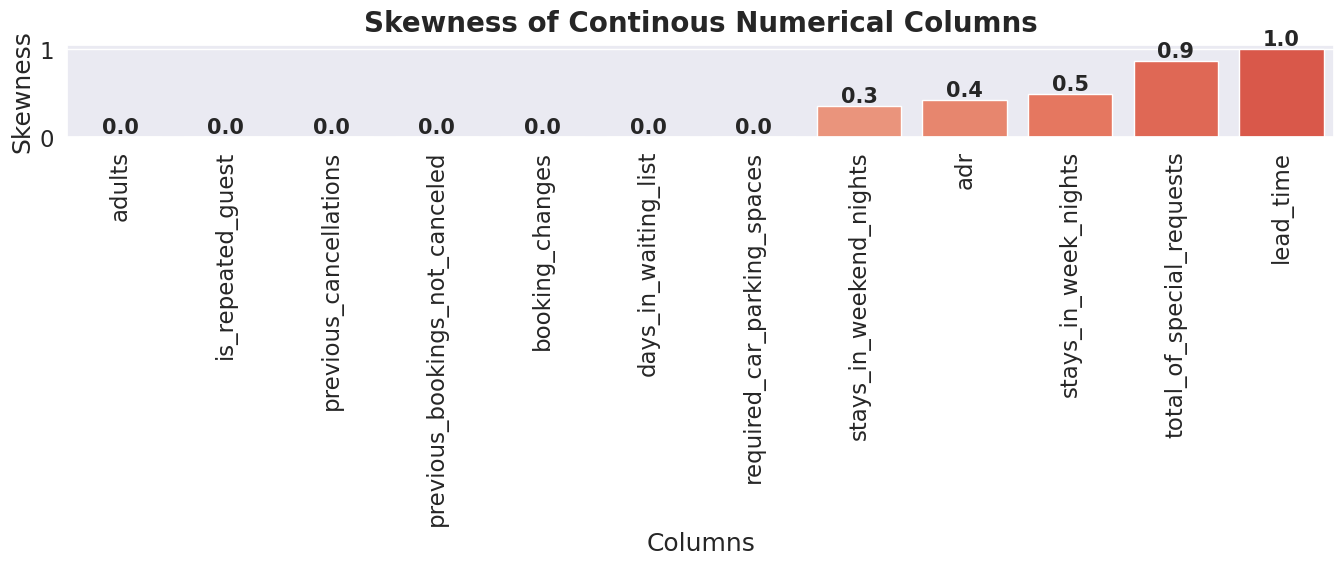

In [16]:
skewness = df[columns].skew().sort_values()
plt.figure(figsize=(14,6))
sns.barplot(x=skewness.index, y=skewness, palette=sns.color_palette("Reds",19))
for i, v in enumerate(skewness):
  plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


# 📊 Exploatory Data Analysis EDA

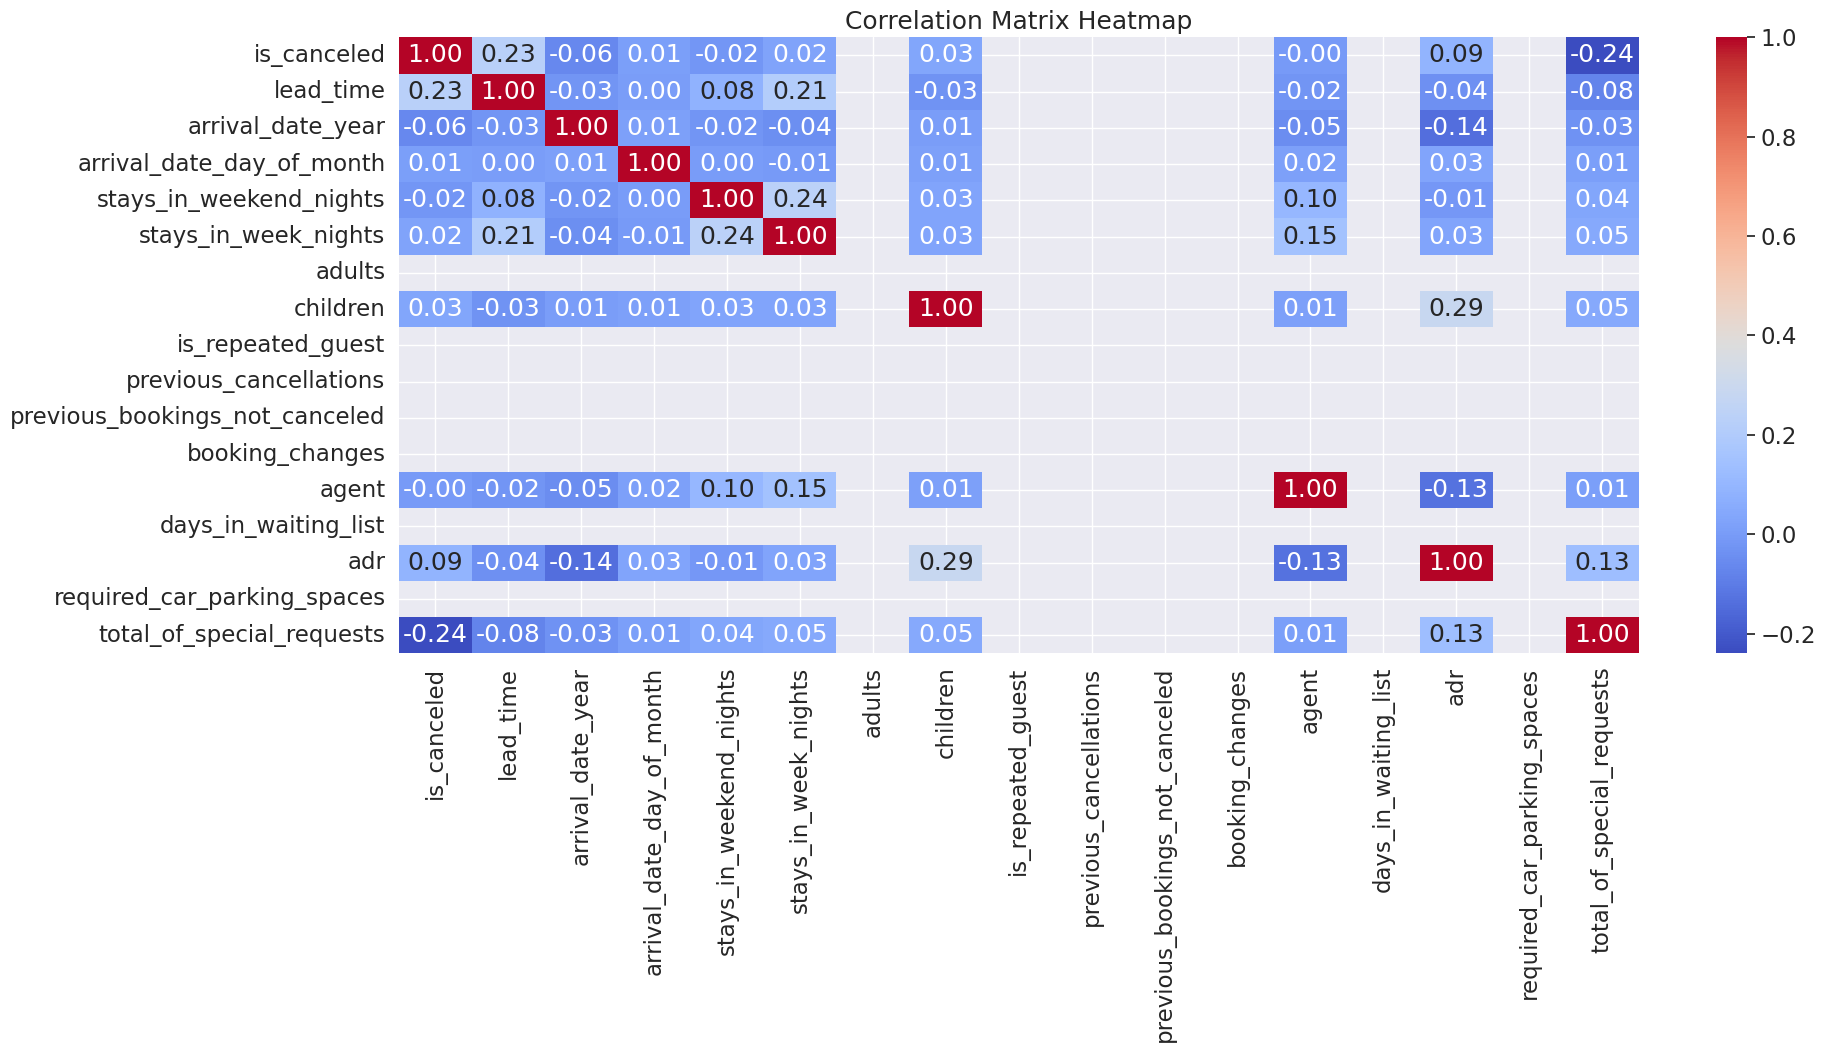

In [17]:
corr = df.corr(numeric_only=True)

# Visualize correlation matrix with heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### `insight1`
### People who get children with them are `more profitable` to the hotel as there is a correlation between `children` and `adr`

## Check the relation between the lead_time and is_cancelled.

<Axes: xlabel='lead_time', ylabel='Count'>

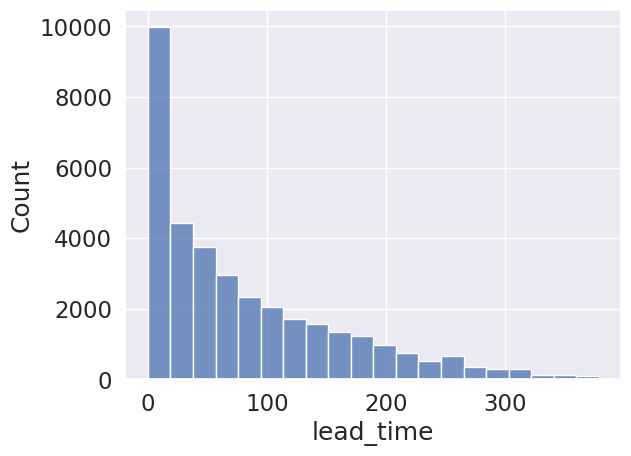

In [18]:
sns.histplot(data=df[(df["is_canceled"]==0)],x="lead_time",bins=20)

### We see from the histogram of the `non-cancelled` reservations: `lead_time` is shifted towards left or small number of days, so : people don't tend` to cancel` when they reserved in date `close`r to the check in.

<Axes: xlabel='lead_time', ylabel='Count'>

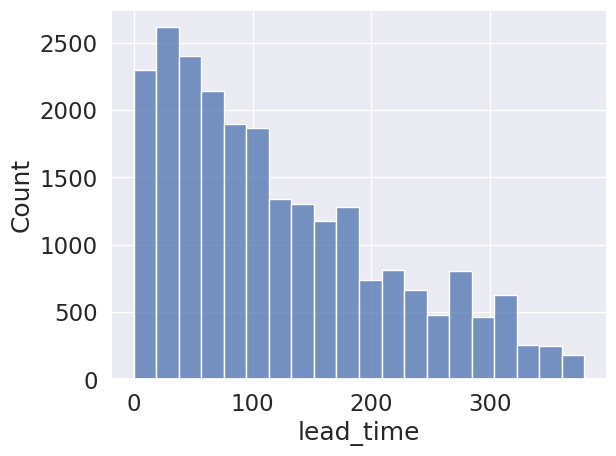

In [19]:
sns.histplot(data=df[(df["is_canceled"]==1)],x="lead_time",bins=20)

### If someone will cancel it's more likely he booked 100 days before the checkin

### Next, We want to see what are the months which are high in booking that are not cancelled.

<Axes: xlabel='Count', ylabel='arrival_date_month'>

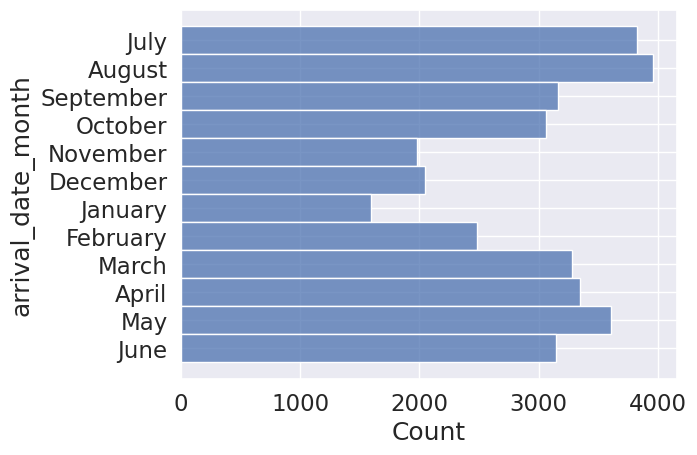

In [20]:
sns.histplot(df[(df["is_canceled"]==0)],y="arrival_date_month")

### insight

### `May, July, August` are the highest months that users book in



<Axes: xlabel='Count', ylabel='arrival_date_month'>

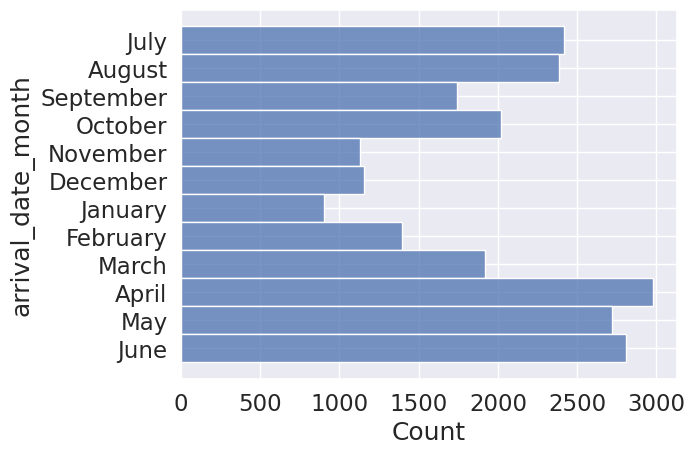

In [21]:
sns.histplot(df[(df["is_canceled"]==1)],y="arrival_date_month")

# - insight
### `April, May, June ` are the most months that the user book in and cancel.)

## Next see the relation between the `deposit type` and cancelation rate.

<Axes: xlabel='Count', ylabel='deposit_type'>

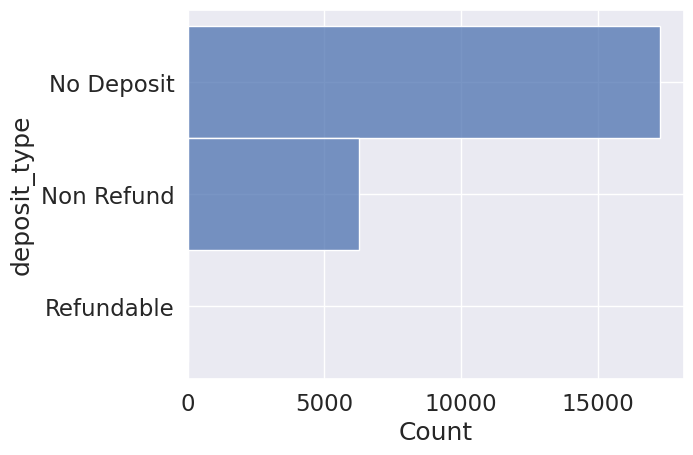

In [22]:
sns.histplot(df[(df["is_canceled"]==1 )],y="deposit_type")

<Axes: xlabel='Count', ylabel='deposit_type'>

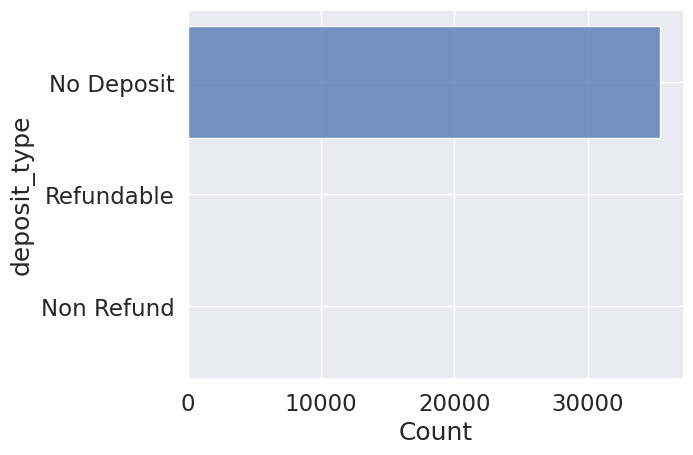

In [23]:
sns.histplot(df[(df["is_canceled"]==0 )],y="deposit_type")


### So We need to get the ratio between the number of people who choose `No_deposit` and `cancelled bookings`.
### and Also, need to get the `ratio `between the `number of people `who choose `Non Refund and cancelled bookings`.





In [24]:
nodeposit = len(df[(df['deposit_type'] == 'No Deposit')])
nonrefund = len(df[(df['deposit_type'] == 'Non Refund')])
nondepositeAndCancelled = len(df[(df['deposit_type'] == 'No Deposit') & (df['is_canceled']==1)])
nonreufndAndCancelled = len(df[(df['deposit_type'] == 'Non Refund') & (df['is_canceled']==1)])
print('No deposit users', nodeposit)
print('Non Refund users', nonrefund)
print('No deposit users & cancelled', nondepositeAndCancelled)
print('Non Refund users & cancelled', nonreufndAndCancelled)
print('ratio between No deposit users / No deposit users that cancelled = ', nondepositeAndCancelled/nodeposit)
print('ratio between Non Refund users / Non Refund users that cancelled = ', nonreufndAndCancelled/nonrefund)

No deposit users 52679
Non Refund users 6303
No deposit users & cancelled 17281
Non Refund users & cancelled 6265
ratio between No deposit users / No deposit users that cancelled =  0.32804343286698684
ratio between Non Refund users / Non Refund users that cancelled =  0.9939711248611772


#### There is a strange pattern that users that use deposit type as non refund tends to cancel more than users that `don't add deposit`. The histogram and the ratio strengthen the pattern

### let see relation bettwen previous_cancellations ans cancelled

<Axes: xlabel='Count', ylabel='customer_type'>

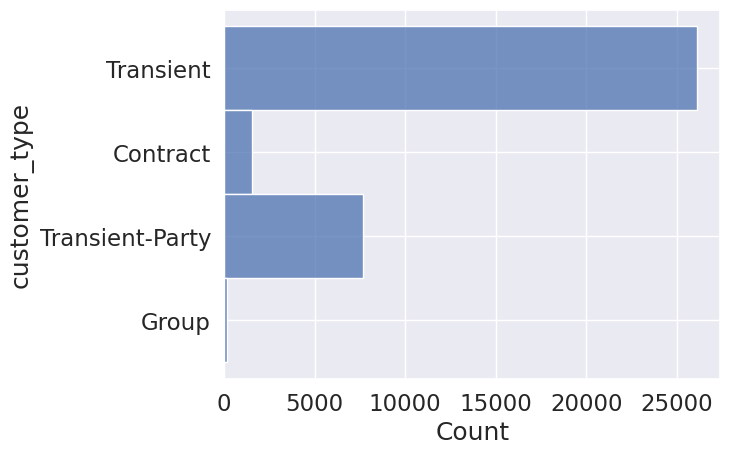

In [25]:
sns.histplot(df[(df["is_canceled"]== 0 )],y="customer_type")

<Axes: xlabel='Count', ylabel='customer_type'>

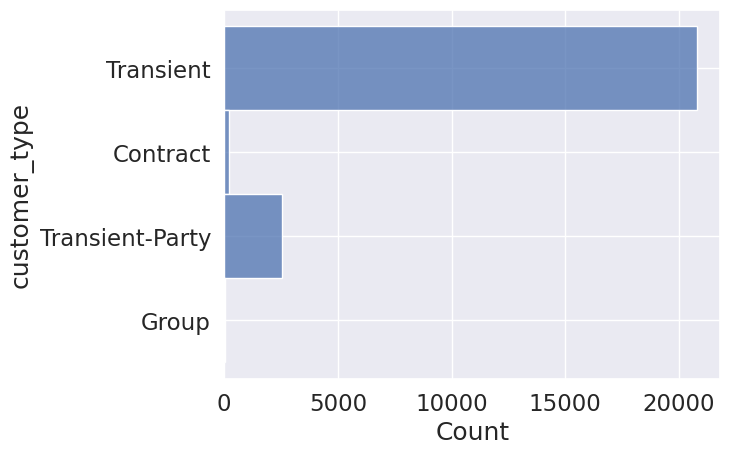

In [26]:
sns.histplot(df[(df["is_canceled"]== 1 )],y="customer_type")

So We need to get the ratio between the number of people who `Transient` and `cancelled bookings`.
and Also, need to get the ratio between the number of people who `Transient and cancelled booking`

In [27]:
T_Transient = len(df[(df['customer_type'] == 'Transient')])
Transient_prety = len(df[(df['customer_type'] == 'Transient-Party')])
contract = len(df[(df['customer_type'] == 'Contract')])
T_TransientAndCancelled = len(df[(df['customer_type'] == 'Transient') & (df['is_canceled']==1)])
Transient_pretyAndCancelled = len(df[(df['customer_type'] == 'Transient-Party') & (df['is_canceled']==1)])
ContractAndCancelled = len(df[(df['customer_type'] == 'Contract') & (df['is_canceled']==1)])
print('customer_type_Transient', T_Transient)
print('customer_type_Transient_Party',Transient_prety)
print('T_Transient_users & cancelled', T_TransientAndCancelled)
print('Transient_prety users & cancelled', Transient_pretyAndCancelled)
print('ratio between Transient  users & cancelled /Transient users  = ', T_TransientAndCancelled/T_Transient)
print('ratio between Transient_prety users & cancelled / Transient_prety users  = ', Transient_pretyAndCancelled/Transient_prety)
print('ratio between Contract & cancelled / Contract users  = ',ContractAndCancelled/contract)



customer_type_Transient 46883
customer_type_Transient_Party 10218
T_Transient_users & cancelled 20784
Transient_prety users & cancelled 2556
ratio between Transient  users & cancelled /Transient users  =  0.44331634067785763
ratio between Transient_prety users & cancelled / Transient_prety users  =  0.2501467997651204
ratio between Contract & cancelled / Contract users  =  0.1225769669327252


<Axes: xlabel='Count', ylabel='total_of_special_requests'>

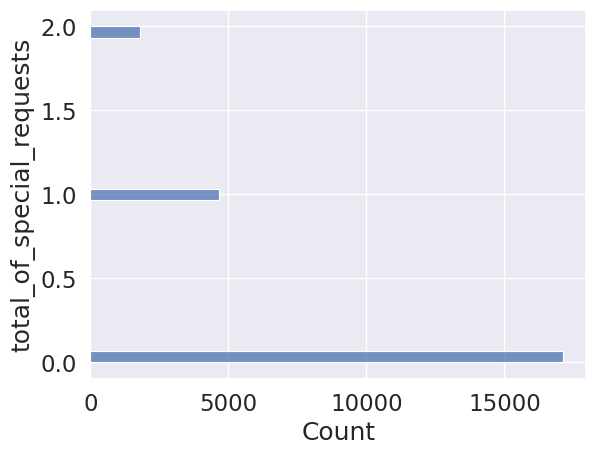

In [28]:
sns.histplot(df[(df["is_canceled"]== 1 )],y="total_of_special_requests")


<Axes: xlabel='Count', ylabel='total_of_special_requests'>

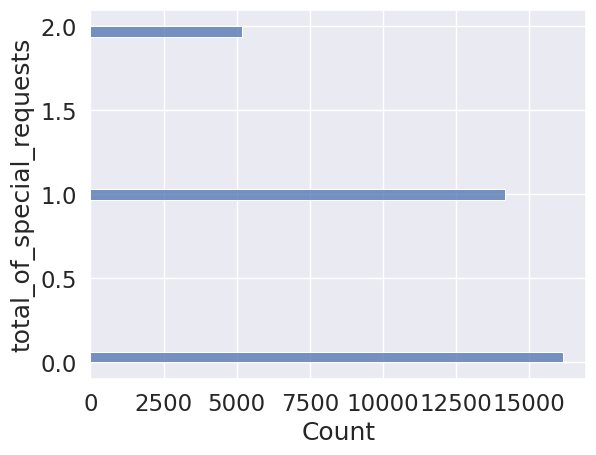

In [29]:
sns.histplot(df[(df["is_canceled"]== 0 )],y="total_of_special_requests")

## See which customers are more loyal to their hotel, and the next time any customer has this rule will be given a promotion.

In [30]:
loyal_customers = df[(df['previous_bookings_not_canceled'] > 3) & (df['previous_cancellations'] == 0)]
print('number of loyal customers till now', len(loyal_customers))

number of loyal customers till now 0


# 📈 Feature Engineering

In [31]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# ⚙️ Data Preprocessing Part-2
- To transform data for creating more accurate & robust model.

In [32]:
# import seaborn as sns

# def remove_outlier(df, list):
#     """Remove outliers from a specified column using the Interquartile Range (IQR) method.

#     Parameters:
#     - df: DataFrame containing the data
#     - col: Column name for which outliers should be removed

#     Returns:
#     - DataFrame with outliers removed
#     """
#     for col in list:
#       q1, q3 = df[col].quantile([0.25, 0.75])
#       iqr = q3 - q1
#       lower = q1 - (1.5 * iqr)
#       upper = q3 + (1.5 * iqr)

#       df = df[((df[col] >= lower) & (df[col] <= upper))]

#     return df
# def boxplot(df, col_name):
#     sns.boxplot( data = df[col_name], orient="h")

# spark

In [33]:
! pip install pyspark

In [34]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Python Spark DataFrames basic example').getOrCreate()

In [35]:
sdf =spark.createDataFrame(df)

In [36]:
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- days_in_waiting_list: long (nu

In [37]:
sdf.show(3)

+-----------------+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+-----+---------------------------+-------------------------+-------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|  adr|required_car_parking_spaces|total_of_special_requests|revenue|
+-----------------+-----------+---------+-----------------+------------------+-------------------------+

In [38]:
sdf.createOrReplaceTempView("hotels_booking")
sdf.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable = true)
 |-- days_in_waiting_list: long (nu

### get the most repeated agencies with non cancelled bookings


In [39]:
command="""
select  agent ,count(agent) as numberOfBookings
from hotels_booking
where isnan(agent)=0  and is_canceled = 0
group by agent
order by numberOfBookings DESC
limit 5"""
spark.sql(command).show()


+-----+----------------+
|agent|numberOfBookings|
+-----+----------------+
|  9.0|           10880|
|240.0|            3567|
|  7.0|            2010|
| 14.0|            1421|
| 28.0|            1288|
+-----+----------------+



##### We have `3 `agencies`(9, 240, 7)` that we can offer their users some promotions, as these agencies bring us huge number of visitors.



### Let's get the users that have large difference between the not canceled bookings and canceled bookings. Any further booking that contains these criteria we will give them promotions. as they are serious customers.



In [40]:
command="""
select * ,(previous_cancellations-previous_bookings_not_canceled)as loyality FROM hotels_booking
where (previous_cancellations-previous_bookings_not_canceled) >1
order by loyality
limit 5"""
spark.sql(command).show()

+-----+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+---+---------------------------+-------------------------+-------+--------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_requests|revenue|loyality|
+-----+-----------+---------+-----------------+------------------+-------------------------+----------------------

### Get the relation between number of stays in weekend and the adr

In [41]:
command="""
select AVG(adr)AS AVG_adr,stays_in_weekend_nights from hotels_booking
group by stays_in_weekend_nights
order by AVG_adr DESC
limit 5
"""
spark.sql(command).show()

+------------------+-----------------------+
|           AVG_adr|stays_in_weekend_nights|
+------------------+-----------------------+
|107.74941358024687|                      3|
|100.93224860853418|                      1|
|100.39143986354479|                      0|
|   98.961849641351|                      2|
| 98.85704724409445|                      4|
+------------------+-----------------------+



#### Staying in the weekend `2 or 3` days are the most profitable to the hotel

### Let's discover the average adr according to the room type and what the type of rooms are more profitable

In [42]:
import plotly.express as pltx
pltx.box(data_frame = df[(df['is_canceled'] == 0)], x = 'reserved_room_type', y = 'adr', color = 'hotel')

Room of type H,L in Renaissance and G,F in JW Marriott are the highest in ADR.

## Get the room types that are poorly booked

<Axes: xlabel='reserved_room_type', ylabel='Count'>

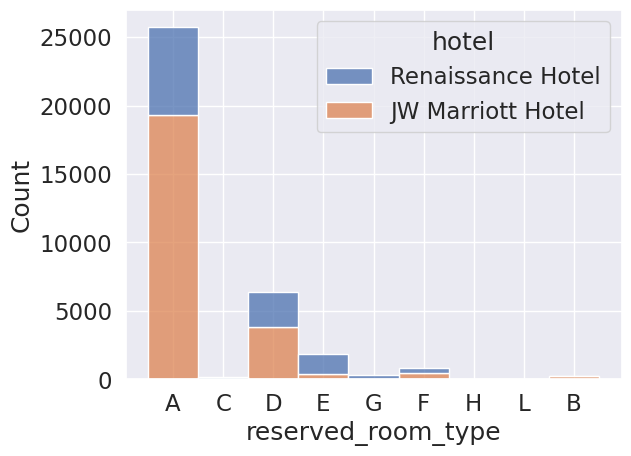

In [43]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='reserved_room_type', hue='hotel', multiple='stack')


## Get the rooms that are least booked


In [44]:
command="""
select reserved_room_type ,count (reserved_room_type) as counter  from hotels_booking
where is_canceled =0
group by reserved_room_type
order by counter
"""
spark.sql(command).show()

+------------------+-------+
|reserved_room_type|counter|
+------------------+-------+
|                 L|      2|
|                 H|     23|
|                 C|    158|
|                 B|    269|
|                 G|    290|
|                 F|    801|
|                 E|   1827|
|                 D|   6388|
|                 A|  25720|
+------------------+-------+



### We will do promotions on the room types` (L,H,C,B,G)` as they are the least booked. (promotion #3)



## Get the average room price in each month for each hotel.

<Axes: xlabel='arrival_date_month'>

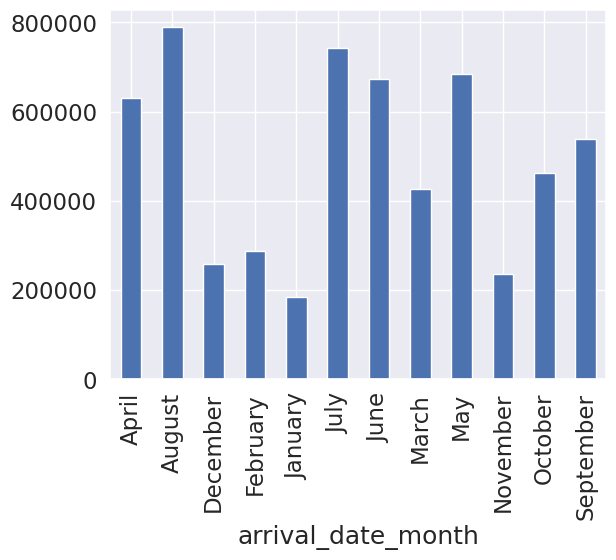

In [45]:
df.groupby('arrival_date_month')['adr'].sum().plot(kind='bar')


In [46]:
command="""
select arrival_date_month,avg (adr) as avg_price  from hotels_booking
where is_canceled=0
group by arrival_date_month
order by avg_price DESC
"""
spark.sql(command).show()

+------------------+------------------+
|arrival_date_month|         avg_price|
+------------------+------------------+
|            August|121.41673572511408|
|              July|117.43581675392738|
|              June|111.64572929936327|
|               May|105.70972245351095|
|         September|105.59723222748802|
|             April|  98.5703918635955|
|           October| 88.85818835840413|
|             March| 79.41980195003048|
|          December| 78.43640937957983|
|          February| 73.56087429492355|
|          November| 72.99873864783044|
|           January| 70.69349186483106|
+------------------+------------------+



#### `August, July, June` (summer months) are the highest in room prices. give promotion in these months to increase number of bookings. (promotion#4)

# Visualize the total revenue in each month.

<Axes: xlabel='arrival_date_month'>

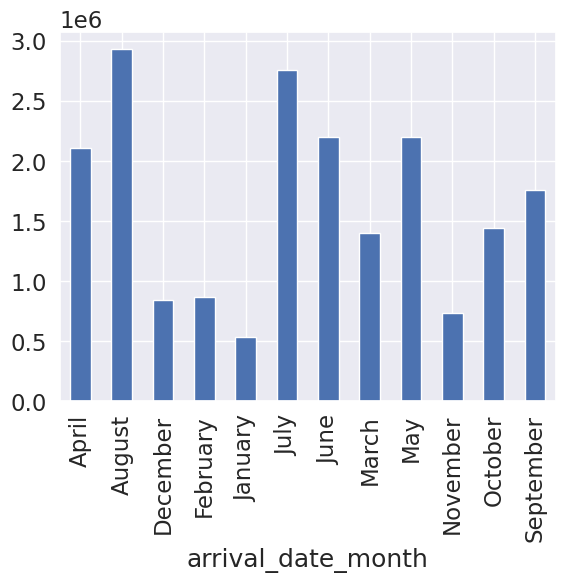

In [47]:
df.groupby('arrival_date_month')['revenue'].sum().plot(kind='bar')

In [48]:
command="""
select arrival_date_month,cast(sum(revenue)as numeric(36,2) )as Total_revenue  from hotels_booking
where is_canceled=0
group by arrival_date_month
order by Total_revenue DESC
"""
spark.sql(command).show()

+------------------+-------------+
|arrival_date_month|Total_revenue|
+------------------+-------------+
|            August|   1724525.37|
|              July|   1610633.84|
|               May|   1235730.72|
|              June|   1160439.18|
|             April|   1083240.77|
|         September|   1074994.95|
|           October|    866913.69|
|             March|    862229.19|
|          February|    553465.78|
|          December|    503810.90|
|          November|    456253.75|
|           January|    322635.78|
+------------------+-------------+



### The most profitable months are `August, July, June`

In [49]:
# remove some useless columns to the cancelation to get better results with the predictions (features selection)
sdf_cleaned = sdf.drop('arrival_date_year','arrival_date_day_of_month', 'children', 'meal', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces')

# get numerical , categorical columns of the dataframe


In [50]:
# get numerical , categorical columns of the dataframe
numerical_columns = []
categorical_columns = []
for col in sdf_cleaned.dtypes:
    if col[1] == 'string':
        categorical_columns.append(col[0])
    elif col[0] !="is_canceled":
        numerical_columns.append(col[0])

In [51]:
numerical_columns

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'total_of_special_requests',
 'revenue']

### Do some preprocessing to be able to fit the model to the data.

In [52]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import StringIndexer, VectorAssembler

# encode the categorical columns to numerical values using StringIndexer
stages = []
for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    stages += [stringIndexer]

# apply the stages to the dataframe
featurizationPipeline = Pipeline(stages = stages)
featurizationPipelineModel = featurizationPipeline.fit(sdf)
sdf = featurizationPipelineModel.transform(sdf)

# add the independant variables to the stages except the target variable 'is_canceled'
assemblerInputs = []
for numericalCol in numerical_columns:
    assemblerInputs.append(numericalCol)

for categoricalCol in categorical_columns:
    if categoricalCol != 'is_canceled':
        assemblerInputs.append(categoricalCol + "Index")

# add the numerical columns to the stages
stages_split = []
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="feature_vector")
stages_split += [assembler]
featurizationPipeline = Pipeline(stages = stages_split)
featurizationPipelineModel = featurizationPipeline.fit(sdf)
sdf = featurizationPipelineModel.transform(sdf)


In [53]:
# # add column named 'label' is the same as 'is_canceled' column as the crossvalidator needs it
sdf = sdf.withColumn("label", sdf["is_canceled"])


In [54]:
sdf.toPandas().head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,revenue,hotelIndex,arrival_date_monthIndex,countryIndex,distribution_channelIndex,reserved_room_typeIndex,assigned_room_typeIndex,deposit_typeIndex,customer_typeIndex,feature_vector,label
0,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,196.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,"(14.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 98.0...",0
1,Renaissance Hotel,0,14,2018,July,1,0,2,2,0.0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,196.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,"(14.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 98.0...",0


In [55]:
# split the data to train and test
train, test = sdf.randomSplit([0.8, 0.2], seed = 12345)

### [1st Model] will be logistic regression that predicts whether the booking will be canceled or not



In [56]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=25)
lrModel = lr.fit(train)

predictions = lrModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)
# print(lrModel.coefficients) #The coefficients represent the weights assigned to each feature
# # These weights indicate the importance or contribution of each feature towards predicting the target variable
# print(lrModel.intercept)#The intercept term is the constant term added to the linear combination of feature values multiplied by their respective coefficients
# # It represents the baseline prediction when all features are zero.

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.75722368760063...|
|          0|       0.0|[0.76120434732416...|
|          0|       0.0|[0.77333268478428...|
|          0|       0.0|[0.97248679716808...|
|          0|       0.0|[0.90641220074125...|
|          0|       0.0|[0.71663024504171...|
|          0|       0.0|[0.82963217933711...|
|          0|       0.0|[0.66383016270476...|
|          0|       0.0|[0.70140861673504...|
|          0|       0.0|[0.80861347171011...|
+-----------+----------+--------------------+
only showing top 10 rows



In [57]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="is_canceled", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7353088480801335


# evaluate model

In [58]:
lrModel.evaluate(test).predictions.show(3)

+-----------------+-----------+---------+-----------------+------------------+-------------------------+-----------------------+--------------------+------+--------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+----+---------------------------+-------------------------+-------+----------+-----------------------+------------+-------------------------+-----------------------+-----------------------+-----------------+------------------+--------------------+-----+--------------------+--------------------+----------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booki

## or

In [59]:
# from pyspark.sql.functions import expr

# # Assuming 'predictions' DataFrame contains 'prediction' and 'is_canceled' columns

# # Calculate the number of correct predictions
# correct_predictions = predictions.filter(expr('prediction = label')).count()

# # Calculate the total number of predictions
# total_predictions = predictions.count()

# # Calculate the accuracy score
# accuracy = correct_predictions / total_predictions

# # Print the accuracy score
# print("Accuracy:", accuracy)


### Let's tune the hyperparameters of the model using the `crossValidator` which automate the tuning by trying the given parameters and choose the best one based on the evaluator.

In [60]:
# tune the model using the training data
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
                .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
                .addGrid(lr.maxIter, [10, 20, 40])
                .build())

evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
cvModel.bestModel

LogisticRegressionModel: uid=LogisticRegression_c669973825fb, numClasses=2, numFeatures=19

In [61]:
predictions = cvModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)

accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.75722047089830...|
|          0|       0.0|[0.76120276508143...|
|          0|       0.0|[0.77333110101147...|
|          0|       0.0|[0.97248665895468...|
|          0|       0.0|[0.90641232357480...|
|          0|       0.0|[0.71662937417308...|
|          0|       0.0|[0.82962975417005...|
|          0|       0.0|[0.66382767090484...|
|          0|       0.0|[0.70140610121028...|
|          0|       0.0|[0.80861131968965...|
+-----------+----------+--------------------+
only showing top 10 rows

accuracy of the model =  73.53088480801335 %


78% accuracy score for the logistic regression. focus on  `ROC AREA`

### [2nd Model] will be Decision Tree classifier

In [62]:
from pyspark.ml.classification import DecisionTreeClassifier
dt=DecisionTreeClassifier(featuresCol="feature_vector",labelCol="is_canceled",maxBins=180)
dtModel = dt.fit(train)

predictions = dtModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.97457158651188...|
|          0|       0.0|[0.75264302316862...|
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.80752287360216...|
|          0|       0.0|[0.80752287360216...|
|          0|       1.0|[0.44279125130188...|
+-----------+----------+--------------------+
only showing top 10 rows



In [63]:
# get the accuracy of the model using accuracy_score on the test data
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  74.87479131886478 %


### 77.8 % accuracy for the Decision tree.

# [3rd Model] Try the random forest classifier.

In [64]:
# train random forest model on the data
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxBins=180)
rfModel = rf.fit(train)

predictions = rfModel.transform(test)
predictions.select('is_canceled', 'prediction', 'probability').show(10)

+-----------+----------+--------------------+
|is_canceled|prediction|         probability|
+-----------+----------+--------------------+
|          0|       0.0|[0.75467342643038...|
|          0|       0.0|[0.78547799333094...|
|          0|       0.0|[0.78547799333094...|
|          0|       0.0|[0.83865141225777...|
|          0|       0.0|[0.81032816352732...|
|          0|       0.0|[0.71567862585430...|
|          0|       0.0|[0.78482976611963...|
|          0|       0.0|[0.70992487437618...|
|          0|       0.0|[0.71108214293611...|
|          0|       0.0|[0.76203511655142...|
+-----------+----------+--------------------+
only showing top 10 rows



In [65]:
# get the accuracy of the model using accuracy_score on the test data
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  73.70617696160268 %


## Also 79% accuracy for the Random Forest Model.

## [4th Model] Try to train Support Vector Machines to classify, SVM are the best in binary classifications.



In [66]:
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=10)
svmModel = svm.fit(train)

predictions = svmModel.transform(test)
predictions.select('is_canceled', 'prediction').show(10)

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 10 rows



In [67]:
# accuracy of the model
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  70.27545909849749 %


75% accuracy SVM

# [5th Model] Try Gradient Boost

In [68]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'feature_vector', labelCol = 'is_canceled', maxIter=10, maxBins=180)
gbtModel = gbt.fit(train)

predictions = gbtModel.transform(test)
predictions.select('is_canceled', 'prediction').show(10)

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 10 rows



In [69]:
# accuracy of the model
accuracy = accuracy_score(predictions.select('is_canceled').toPandas(), predictions.select('prediction').toPandas())
print('accuracy of the model = ', accuracy*100, '%')

accuracy of the model =  79.67445742904842 %


# This is formatted as code


Gradient Boost 82% accuracy